In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("../Datasets/Filter Jateng dan DM.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Nomor_peserta                                         426 non-null    int64  
 1   Nomor_keluarga                                        426 non-null    int64  
 2   Bobot                                                 426 non-null    float64
 3   ID_Kunjungan                                          426 non-null    object 
 4   Tanggal_kunjungan                                     426 non-null    object 
 5   Tanggal_tindakan                                      426 non-null    object 
 6   Tanggal_pulang                                        426 non-null    object 
 7   Provinsi_faskes                                       426 non-null    int64  
 8   Kode_Kab_Kota_faskes                                  426 no

In [ ]:
data["Kode_diagnosis_berdasarkan_ICD_10__3_digit_"].value_counts()

E11    401
E10     25
Name: Kode_diagnosis_berdasarkan_ICD_10__3_digit_, dtype: int64

In [ ]:
# selected = [
#     "Nomor_peserta",
#     "Nomor_keluarga",
#     "Bobot",
#     "Kode_Kab_Kota_faskes",
#     "Segmen_peserta",
#     "Kode_diagnosis_berdasarkan_ICD_10__3_digit_",
#     "Biaya_tagih",
#     "Hasil_Pemeriksaan_gula_darah_puasa__GDP__1",
#     "Tanggal_lahir_peserta",
#     "Hubungan_Keluarga",
#     "Jenis_Kelamin",
#     "Status_perkawinan",
#     "Kabupaten_Kota_Tempat_Tinggal_Peserta",
#     "Tahun_meninggal"
# ]
# selected

In [ ]:
# penghapusan kolom yang tidak berguna atau tidak diperlukan dari suatu dataset.
# data.drop(['ID_Kunjungan', 'Tanggal_kunjungan', 'Tanggal_tindakan', 'Tanggal_pulang', 'Provinsi_faskes', 'Kepemilikan_faskes', 'Jenis_faskes', 'Tipe_faskes', 'Tingkat_layanan', 'Kode_dan_Nama_diagnosis_berdasarkan_ICD_10__3_digit_', 'Kode_diagnosis__3_5_digit_', 'Nama_Diagnosis', 'Nama_Tindakan', 'Biaya_verifikasi', 'Hasil_Pemeriksaan_gula_darah_puasa__GDP__2', 'Nomor_peserta_1', 'Nomor_keluarga_1', 'Kelas_rawat', 'Segmentasi_peserta', 'Provinsi_Tempat_Tinggal_Peserta', 'Kepemilikan_faskes_1', 'Jenis_faskes_', 'Provinsi_Fasilitas_Kesehatan_Peserta_Terdaftar', 'Kabupaten_Kota_Fasilitas_Kesehatan_Peserta_Terdaftar', 'Bobot_1', 'Tahun_Sampel', 'Status_Kepesertaan'], axis= 1, inplace= True)
data.drop(['Nomor_peserta', 'Nomor_keluarga', 'Tahun_meninggal', 'Tanggal_lahir_peserta', 'Biaya_tagih', 'ID_Kunjungan', 'Tanggal_kunjungan', 'Tanggal_tindakan', 'Tanggal_pulang', 'Provinsi_faskes', 'Kepemilikan_faskes', 'Jenis_faskes', 'Tipe_faskes', 'Tingkat_layanan', 'Kode_dan_Nama_diagnosis_berdasarkan_ICD_10__3_digit_', 'Kode_diagnosis__3_5_digit_', 'Nama_Diagnosis', 'Nama_Tindakan', 'Biaya_verifikasi', 'Hasil_Pemeriksaan_gula_darah_puasa__GDP__2', 'Nomor_peserta_1', 'Nomor_keluarga_1', 'Kelas_rawat', 'Segmentasi_peserta', 'Provinsi_Tempat_Tinggal_Peserta', 'Kepemilikan_faskes_1', 'Jenis_faskes_', 'Provinsi_Fasilitas_Kesehatan_Peserta_Terdaftar', 'Kabupaten_Kota_Fasilitas_Kesehatan_Peserta_Terdaftar', 'Bobot_1', 'Tahun_Sampel', 'Status_Kepesertaan'], axis= 1, inplace= True)

In [ ]:
data.head()

,Bobot,Kode_Kab_Kota_faskes,Segmen_peserta,Kode_diagnosis_berdasarkan_ICD_10__3_digit_,Hasil_Pemeriksaan_gula_darah_puasa__GDP__1,Hubungan_Keluarga,Jenis_Kelamin,Status_perkawinan,Kabupaten_Kota_Tempat_Tinggal_Peserta
0,9.918155,3311,5,E11,124.0,1,1,2,3508
1,13.108784,3376,1,E11,366.0,1,1,2,3525
2,8.448109,3302,1,E10,87.0,1,2,2,1504
3,8.448109,3302,1,E10,188.0,1,2,2,1504
4,8.448109,3302,1,E10,130.0,1,2,2,1504


In [ ]:
# status_kehidupan = []

# for x in data["Tahun_meninggal"]:
#   if x > 0: # Nilai Mean Tahun_meninggal
#     status_kehidupan.append('0') # komplikasi
#   else:
#     status_kehidupan.append('1') # tidak komplikasi

# data["Tahun_meninggal"] = status_kehidupan
# data["Tahun_meninggal"]

In [ ]:
#  penghitungan dan pengelompokan kolom dalam suatu dataset berdasarkan tipe datanya.
cat_columns = data.select_dtypes(object).columns.to_list()
print(f"Kolom Kategori: {cat_columns}")
print()
num_columns = data.select_dtypes(np.number).columns.to_list()
print(f"Kolom Number: {num_columns}")
print()

Kolom Kategori: ['Kode_diagnosis_berdasarkan_ICD_10__3_digit_']

Kolom Number: ['Bobot', 'Kode_Kab_Kota_faskes', 'Segmen_peserta', 'Hasil_Pemeriksaan_gula_darah_puasa__GDP__1', 'Hubungan_Keluarga', 'Jenis_Kelamin', 'Status_perkawinan', 'Kabupaten_Kota_Tempat_Tinggal_Peserta']



In [ ]:
# missing value data
data.isnull().sum()

Bobot                                          0
Kode_Kab_Kota_faskes                           0
Segmen_peserta                                 0
Kode_diagnosis_berdasarkan_ICD_10__3_digit_    0
Hasil_Pemeriksaan_gula_darah_puasa__GDP__1     0
Hubungan_Keluarga                              0
Jenis_Kelamin                                  0
Status_perkawinan                              0
Kabupaten_Kota_Tempat_Tinggal_Peserta          0
dtype: int64

In [ ]:
# menghitung jumlah nilai unik (distinct) dalam setiap kolom DataFrame data.
unique_counts = data.nunique()
print(unique_counts)

Bobot                                           29
Kode_Kab_Kota_faskes                            17
Segmen_peserta                                   5
Kode_diagnosis_berdasarkan_ICD_10__3_digit_      2
Hasil_Pemeriksaan_gula_darah_puasa__GDP__1     284
Hubungan_Keluarga                                3
Jenis_Kelamin                                    2
Status_perkawinan                                2
Kabupaten_Kota_Tempat_Tinggal_Peserta           28
dtype: int64


In [ ]:
# Menghitung jumlah data dari kolom Kode diagnosis_berdasarkan ICD 10 (3digit)
print(f"Total categories pada kolom Kode diagnosis_berdasarkan ICD 10 (3digit):\n{data['Kode_diagnosis_berdasarkan_ICD_10__3_digit_'].value_counts()}")

Total categories pada kolom Kode diagnosis_berdasarkan ICD 10 (3digit):
E11    401
E10     25
Name: Kode_diagnosis_berdasarkan_ICD_10__3_digit_, dtype: int64


In [ ]:
# Menghitung jumlah data dari kolom Jenis Kelamin
print(f"Total categories pada kolom Jenis Kelamin:\n{data['Jenis_Kelamin'].value_counts()}")

Total categories pada kolom Jenis Kelamin:
2    226
1    200
Name: Jenis_Kelamin, dtype: int64


**Jenis kelamin:**
1. Laki
2. Perempuan

In [ ]:
# Daftar variabel kategorikal dengan mengidentifikasi tipe data "object"
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Variabel kategorikal dalam dataset:", object_cols)

Variabel kategorikal dalam dataset: ['Kode_diagnosis_berdasarkan_ICD_10__3_digit_']


In [ ]:
# Inisialisasi objek LabelEncoder
LE = LabelEncoder()

# Melakukan label encoding untuk setiap variabel kategorikal
for i in object_cols:
    data[i] = LE.fit_transform(data[i])

print("Semua fitur sekarang bersifat numerik")

Semua fitur sekarang bersifat numerik


In [ ]:
data["Kode_diagnosis_berdasarkan_ICD_10__3_digit_"].value_counts()

1    401
0     25
Name: Kode_diagnosis_berdasarkan_ICD_10__3_digit_, dtype: int64

In [ ]:
# selected = [
#     "Nomor_peserta",
#     "Nomor_keluarga",
#     "Bobot",
#     "Kode_Kab_Kota_faskes",
#     "Segmen_peserta",
#     "Kode_diagnosis_berdasarkan_ICD_10__3_digit_",
#     "Biaya_tagih",
#     "Hasil_Pemeriksaan_gula_darah_puasa__GDP__1",
#     "Tanggal_lahir_peserta",
#     "Hubungan_Keluarga",
#     "Jenis_Kelamin",
#     "Status_perkawinan",
#     "Kabupaten_Kota_Tempat_Tinggal_Peserta",
#     "Tahun_meninggal"
# ]
# data_selected = data[selected]

# X = data_selected.drop(columns="Kode_diagnosis_berdasarkan_ICD_10__3_digit_").values # atribut
# y = data_selected["Kode_diagnosis_berdasarkan_ICD_10__3_digit_"].values #kelas/target

In [ ]:
X = data.drop(columns="Kode_diagnosis_berdasarkan_ICD_10__3_digit_") # atribut
y = data["Kode_diagnosis_berdasarkan_ICD_10__3_digit_"] #kelas/target

In [ ]:
# split data dengan proporsi 70:30

from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Object Scaling / Normalisasi hanya di fit ke data training

scaler = MinMaxScaler()
columns = list(X_train.columns)
scaler.fit(X_train[columns])

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# jika ingin tetap dalam bentuk dataframe, nilai hasil scaling dapat di assign ke kolom awal
X_train[columns] = X_train_scaled
X_test[columns] = X_test_scaled

In [ ]:
X_train.head()

,Bobot,Kode_Kab_Kota_faskes,Segmen_peserta,Hasil_Pemeriksaan_gula_darah_puasa__GDP__1,Hubungan_Keluarga,Jenis_Kelamin,Status_perkawinan,Kabupaten_Kota_Tempat_Tinggal_Peserta
250,0.975623,1.000000,0.00,0.018944,0.0,0.0,0.0,0.483407
398,0.871148,0.240000,0.75,0.227550,0.0,0.0,0.0,0.433627
118,0.399404,0.933333,0.75,0.142894,1.0,1.0,0.0,0.440824
114,0.399404,0.933333,0.75,0.008402,1.0,1.0,0.0,0.440824
137,0.822403,0.186667,0.25,0.280261,0.5,0.0,0.0,0.158737


MELIHAT KORELASI

In [ ]:
X_train.describe()

,Bobot,Kode_Kab_Kota_faskes,Segmen_peserta,Hasil_Pemeriksaan_gula_darah_puasa__GDP__1,Hubungan_Keluarga,Jenis_Kelamin,Status_perkawinan,Kabupaten_Kota_Tempat_Tinggal_Peserta
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.667305,0.571096,0.396812,0.174735,0.325503,0.533557,0.130872,0.350326
std,0.338462,0.402138,0.440536,0.157587,0.458464,0.499712,0.337828,0.191171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.439543,0.200000,0.000000,0.045179,0.000000,0.000000,0.000000,0.138944
50%,0.822403,0.933333,0.000000,0.160464,0.000000,1.000000,0.000000,0.420132
75%,0.893616,0.973333,0.750000,0.241846,1.000000,1.000000,0.000000,0.442623
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

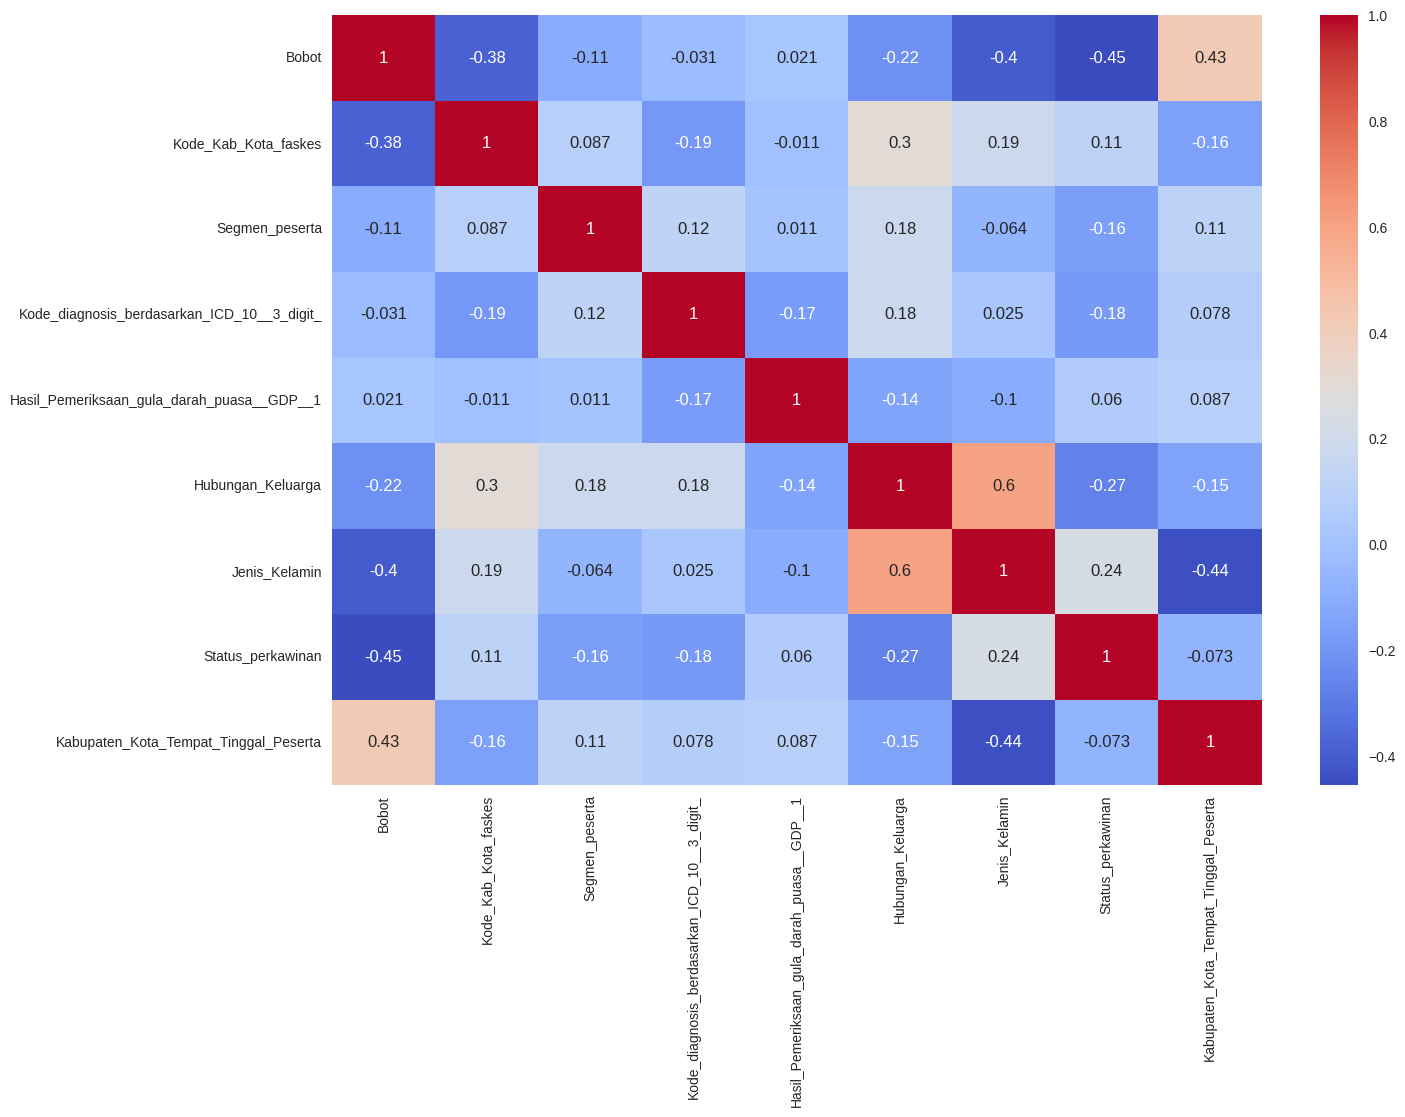

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True,cmap='coolwarm')

HANDLING CLASS IMBLANCE

In [ ]:
y_train.value_counts()

1    286
0     12
Name: Kode_diagnosis_berdasarkan_ICD_10__3_digit_, dtype: int64

Text(0.5, 1.0, 'Perbandingan Tipe DM')

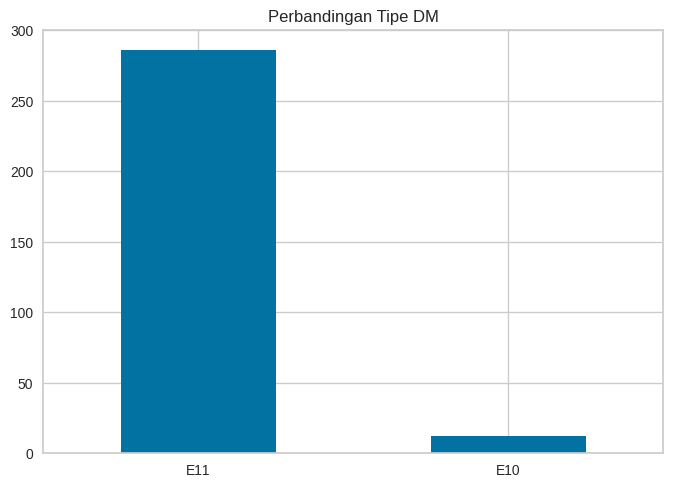

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0,1],['E11','E10'], rotation=0)
plt.title('Perbandingan Tipe DM')

In [ ]:
from imblearn.over_sampling import SMOTE

# sampling strategi 1 artinya data minoritas akan ditambahkan data sintetis hingga perbandingan akan dibuat 1:1
# sampling hanya digunakan untuk data train

smote = SMOTE(sampling_strategy = 1)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

Text(0.5, 1.0, 'Perbandingan Tipe DM')

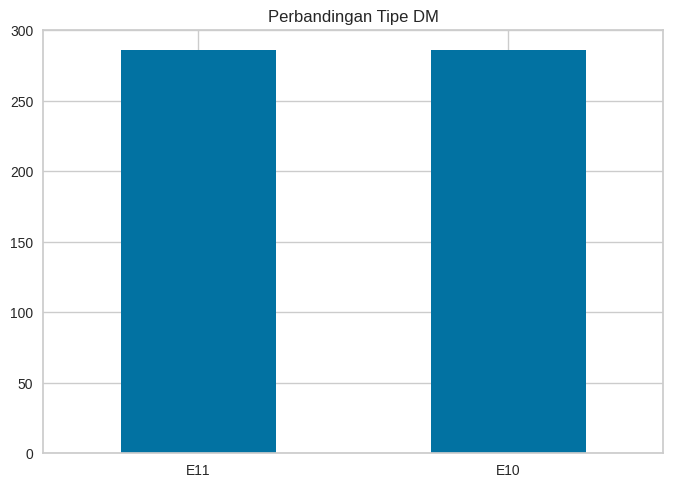

In [ ]:
y_smote.value_counts().plot(kind='bar')
plt.xticks([0,1],['E11','E10'], rotation=0)
plt.title('Perbandingan Tipe DM')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# DECISION TREE

In [ ]:
# DecisionTreeClassifier?

In [ ]:
# Melatih model Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = decision_tree.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print("Akurasi: {:.2f}%".format(accuracy))
print("Presisi: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))
print("Skor F1: {:.2f}%".format(f1))

Akurasi: 96.09%
Presisi: 96.61%
Recall: 99.13%
Skor F1: 97.85%


Dari hasil penggunaan algoritma menggunakan Decision Tree menunjukan 85% akurasinya, sehingga menunjukkan bahwa model Decision Tree yang dibangun relatif baik dalam memprediksi data.

# MODELING RANDOM FOREST

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melatih Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = random_forest.predict(X_test)

# Evaluasi model
akurasi = accuracy_score(y_test, y_pred) * 100
presisi = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

# Menampilkan hasil evaluasi dengan persentase
print("Akurasi: {:.2f}%".format(akurasi))
print("Presisi: {:.2f}%".format(presisi))
print("Recall: {:.2f}%".format(recall))
print("Skor F1: {:.2f}%".format(f1))

Akurasi: 96.09%
Presisi: 96.61%
Recall: 99.13%
Skor F1: 97.85%


Dari hasil penggunaan algoritma menggunakan Random Forest menunjukan 86% akurasinya, sehingga menunjukkan bahwa model Random Forest yang dibangun relatif baik dalam memprediksi data.

# MODELING LOGISTIK REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Membuat objek model Logistic Regression
logreg = LogisticRegression()

# Melatih model dengan data pelatihan
logreg.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = logreg.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print("Akurasi: {:.2f}%".format(accuracy))
print("Presisi: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))
print("Skor F1: {:.2f}%".format(f1))

Akurasi: 89.84%
Presisi: 89.84%
Recall: 100.00%
Skor F1: 94.65%


Dari hasil penggunaan algoritma menggunakan Logistik Regression menunjukan 88% akurasinya, sehingga menunjukkan bahwa model Logistik Regression yang dibangun relatif baik dalam memprediksi data.

# MODELING KNN

In [ ]:
#MENCARI ACURACY DARI TRAINING DATA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, y_train)
k = KFold(n_splits = 5)
score = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv = k).mean()
print("Accuracy:", round(score, 3))

Accuracy: 0.953


In [ ]:
#MENCARI ACCURACY DARI TESTING DATA
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
y_pred = knn.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='macro') * 100
recall = recall_score(y_test, y_pred, average='macro') * 100
f1 = f1_score(y_test, y_pred, average='macro') * 100

# Menampilkan hasil evaluasi dengan persentase
print("Akurasi: {:.2f}%".format(accuracy))
print("Presisi: {:.2f}%".format(precision))
print("Recall: {:.2f}%".format(recall))
print("Skor F1: {:.2f}%".format(f1))

Akurasi: 94.53%
Presisi: 91.25%
Recall: 76.49%
Skor F1: 81.84%


In [ ]:
# print(classification_report(y_test, y_pred))